In [2]:
from sklearn.datasets import load_wine
#导入交叉验证工具
from sklearn.model_selection import cross_val_score
#导入用于分类的支持向量机模型
from sklearn.svm import SVC
wine=load_wine()
#设置SVC的核函数为linear
svc=SVC(kernel='linear')
#使用交叉验证法对SVC评分
scores=cross_val_score(svc,wine.data,wine.target)
print(scores)

[0.88888889 0.94444444 0.97222222 1.         1.        ]


In [3]:
    #使用.mean()来获得分数平均值
    print('交叉验证平均分：{:.3f}'.format(scores.mean()))

交叉验证平均分：0.961


In [4]:
    #设置cv参数为6
    scores = cross_val_score(svc, wine.data, wine.target, cv=6)
    #打印结果
    print('交叉验证得分：\n{}'.format(scores))

交叉验证得分：
[0.86666667 0.9        0.93333333 0.96666667 1.         1.        ]


In [5]:
    #计算交叉验证平均分
    print('交叉验证平均分：{:.3f}'.format(scores.mean()))

交叉验证平均分：0.944


In [6]:
    #打印红酒数据集的分类标签
    print('酒的分类标签:\n{}'.format(wine.target))

酒的分类标签:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [7]:
#导入随即差分公式
from sklearn.model_selection import ShuffleSplit
#设置拆分的份数为10
shuffle_split=ShuffleSplit(test_size=.2,train_size=.7,n_splits=10)
#对拆分好的数据集进行交叉验证
scores=cross_val_score(svc,wine.data,wine.target,cv=shuffle_split)
print(scores)

[0.94444444 0.94444444 0.97222222 0.94444444 0.94444444 0.97222222
 0.94444444 0.94444444 0.94444444 0.97222222]


In [9]:
from sklearn.model_selection import LeaveOneOut
cv=LeaveOneOut()
scores=cross_val_score(svc,wine.data,wine.target,cv=cv)
print(len(scores))
print(scores.mean())

178
0.9550561797752809


In [10]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(wine.data,wine.target,random_state=38)
#设置初始分数为0
best_score=0
#alpha参数遍历
for alpha in [0.01,0.1,1.0,10.0]:
    #最大迭代数遍历
    for max_iter in [100,1000,5000,10000]:
        lasso=Lasso(alpha=alpha,max_iter=max_iter)
        #训练lasso回归模型
        lasso.fit(X_train,y_train)
        score=lasso.score(X_test,y_test)
        #令最佳分数为所有分数中的最高值
        if score>best_score:
            best_score=score
            #定义字典，返回最佳参数和最佳最大迭代次数
            best_parameters={'alpha':alpha,'最大迭代次数':max_iter}
print(best_score)
print(best_parameters)

0.8885499702025689
{'alpha': 0.01, '最大迭代次数': 100}


In [12]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(wine.data,wine.target,random_state=0)
#设置初始分数为0
best_score=0
#alpha参数遍历
for alpha in [0.01,0.1,1.0,10.0]:
    #最大迭代数遍历
    for max_iter in [100,1000,5000,10000]:
        lasso=Lasso(alpha=alpha,max_iter=max_iter)
        #训练lasso回归模型
        lasso.fit(X_train,y_train)
        score=lasso.score(X_test,y_test)
        #令最佳分数为所有分数中的最高值
        if score>best_score:
            best_score=score
            #定义字典，返回最佳参数和最佳最大迭代次数
            best_parameters={'alpha':alpha,'最大迭代次数':max_iter}
print(best_score)
print(best_parameters)

0.8298747376836273
{'alpha': 0.1, '最大迭代次数': 100}


In [13]:
import numpy as np
#alpha参数遍历
for alpha in [0.01,0.1,1.0,10.0]:
    #最大迭代数遍历
    for max_iter in [100,1000,5000,10000]:
        lasso=Lasso(alpha=alpha,max_iter=max_iter)
        scores=cross_val_score(lasso,X_train,y_train,cv=6)
        score=np.mean(scores)
        #令最佳分数为所有分数中的最高值
        if score>best_score:
            best_score=score
            #定义字典，返回最佳参数和最佳最大迭代次数
            best_parameters={'alpha':alpha,'最大迭代次数':max_iter}
print(best_score)
print(best_parameters)

0.8652073211223433
{'alpha': 0.01, '最大迭代次数': 100}


In [14]:
    #用最佳参数模型拟合数据
    lasso = Lasso(alpha=0.01, max_iter=100).fit(X_train, y_train)
    #打印测试数据集得分
    print('测试数据集得分：{:.3f}'.format(lasso.score(X_test,y_test)))

测试数据集得分：0.819


In [15]:
#导入网格搜索工具
from sklearn.model_selection import GridSearchCV
#将需要遍历的参数定义为字典
params={'alpha':[0.01,0.1,1.0,10.0],'max_iter':[100,1000,5000,10000]}
grid_search=GridSearchCV(lasso,params,cv=6)
#使用网格搜索模型拟合数据
grid_search.fit(X_train,y_train)
print(grid_search.score(X_test,y_test))
print(grid_search.best_params_)
#best_score_，这个属性会存储模型在交叉验证中所得的最高分

0.819334891919453
{'alpha': 0.01, 'max_iter': 100}


In [16]:
    #打印网格搜索中的best_score_属性
    print('交叉验证最高得分：{:.3f}'.format(grid_search.best_score_))

交叉验证最高得分：0.865


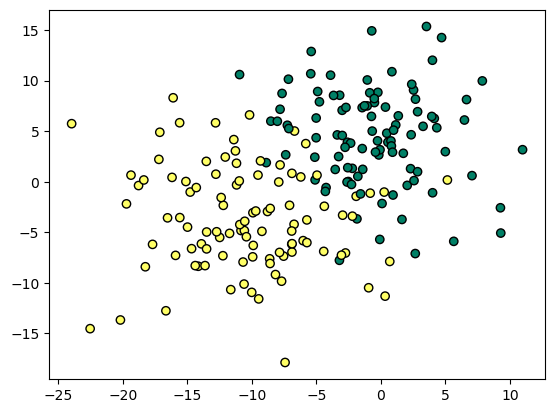

In [18]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
#标准差为5
X,y=make_blobs(n_samples=200,random_state=1,centers=2,cluster_std=5)
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.summer,edgecolor='k')

In [20]:
#导入高斯贝叶斯模型
from sklearn.naive_bayes import GaussianNB
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=68)
gnb=GaussianNB()
gnb.fit(X_train,y_train)
#获取高斯贝叶斯的分类准确概率
predict_proba=gnb.predict_proba(X_test)
print(predict_proba.shape)

(50, 2)


In [21]:
    #打印准确概率的前5个
    print(predict_proba[:5])

[[0.98849996 0.01150004]
 [0.0495985  0.9504015 ]
 [0.01648034 0.98351966]
 [0.8168274  0.1831726 ]
 [0.00282471 0.99717529]]


([], [])

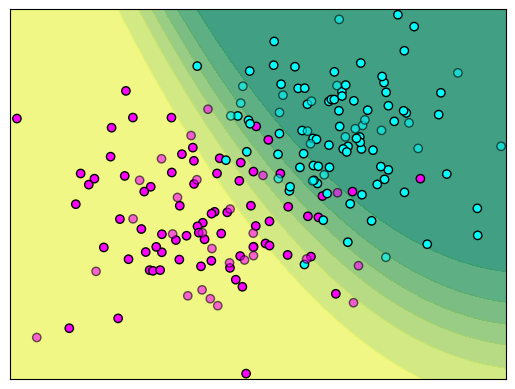

In [24]:
x_min,x_max=X[:,0].min()-.5,X[:,0].max()+.5
y_min,y_max=X[:,1].min()-.5,X[:,1].max()+.5
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.2),
                 np.arange(y_min,y_max,0.2))
z=gnb.predict_proba(np.c_[xx.ravel(),yy.ravel()])[:,1]
z=z.reshape(xx.shape)
#绘制等高线
plt.contourf(xx,yy,z,cmap=plt.cm.summer,alpha=0.8)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=plt.cm.cool,
           edgecolor='k')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=plt.cm.cool,
           edgecolor='k',alpha=0.6)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
#设置横纵轴的单位
plt.xticks(())
plt.yticks(())

In [25]:
    #导入SVC模型
    from sklearn.svm import SVC
    #使用训练集训练模型
    svc = SVC().fit(X_train, y_train)
    #获得SVC的决定系数
    dec_func = svc.decision_function(X_test)
    #打印决定系数中的前5个
    print (dec_func[:5])

[-1.36071347  1.53694862  1.78825594 -0.96133081  1.81826853]


([], [])

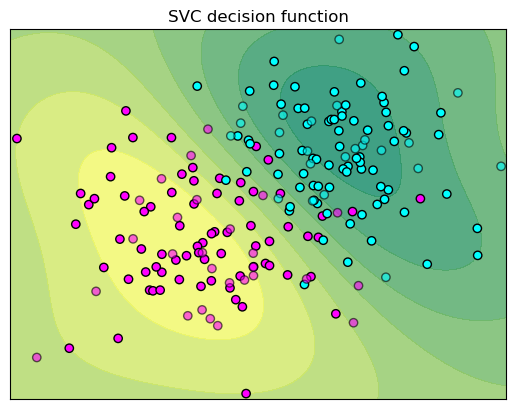

In [27]:
z=svc.decision_function(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)
#绘制等高线
plt.contourf(xx,yy,z,cmap=plt.cm.summer,alpha=0.8)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=plt.cm.cool,
           edgecolor='k')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=plt.cm.cool,
           edgecolor='k',alpha=0.6)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title('SVC decision function')
#设置横纵轴的单位
plt.xticks(())
plt.yticks(())